## yahoo-finance-api 2 v0.0.8

pip install yahoo-finance-api2

https://pypi.org/project/yahoo-finance-api2/

https://finance.yahoo.com

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from yahoo_finance_api2 import share
from yahoo_finance_api2.exceptions import YahooFinanceError

In [2]:
#Seleccionamos el símbolo que queremos obtener, en este caso Microsoft (MSFT)
my_share = share.Share('MSFT')
symbol_data = None

In [3]:
#Obtenemos los datos para el último día con una frecuencia de 15 minutos y creamos el data frame
try:
    symbol_data = my_share.get_historical(share.PERIOD_TYPE_DAY, 1,
                                         share.FREQUENCY_TYPE_MINUTE, 15)
except YahooFinanceError as e:
    print(e.message)
    sys.exist(1)
    
df = pd.DataFrame(symbol_data)

In [4]:
#Creamos una función para convertir el timestamp en datetime
def convert_timestamp_to_date(timestamp):
    return dt.datetime.fromtimestamp(timestamp/1000.0).isoformat()

lst = list(map(convert_timestamp_to_date, df['timestamp']))

#Añadimos la nueva columna de fecha y eliminamos el timestamp
df.insert(1, 'date', lst)
df.drop(['timestamp'], axis='columns', inplace=True)

In [5]:
#Creamos la fecha para filtrar solo los datos de la última sesion
date_from = dt.datetime(2019, 10, 23, 15, 30, 0) #Horario de apertura (hora de España)
date_to = dt.datetime(2019, 10, 23, 21, 45, 0) #Horario de cierre (hora de España)

#Filtro por fecha y hora para obtener todos los registros dentro del horario de contratación
df['date'] = pd.to_datetime(df['date'])
df = df[(df['date'] >= date_from) & (df['date'] <= date_to)]

df.tail(30)

,date,open,high,low,close,volume
52,2019-10-23 15:30:00,136.880005,136.889999,135.809998,136.600006,3052310
53,2019-10-23 15:45:00,136.639999,136.839996,136.330002,136.399994,1201578
54,2019-10-23 16:00:00,136.399994,136.468903,135.610001,135.630005,1128116
55,2019-10-23 16:15:00,135.625000,136.169998,135.619995,135.955002,1138469
56,2019-10-23 16:30:00,135.955002,136.080002,135.720001,135.860001,879996
57,2019-10-23 16:45:00,135.865005,136.240005,135.835007,135.940002,798661
58,2019-10-23 17:00:00,135.940002,136.220001,135.919998,136.119995,709041
59,2019-10-23 17:15:00,136.130005,136.366501,136.125000,136.300003,794084
60,2019-10-23 17:30:00,136.300003,136.380005,136.100006,136.229507,522158
61,2019-10-23 17:45:00,136.220001,136.350006,136.205002,136.240005,320471


Populating the interactive namespace from numpy and matplotlib


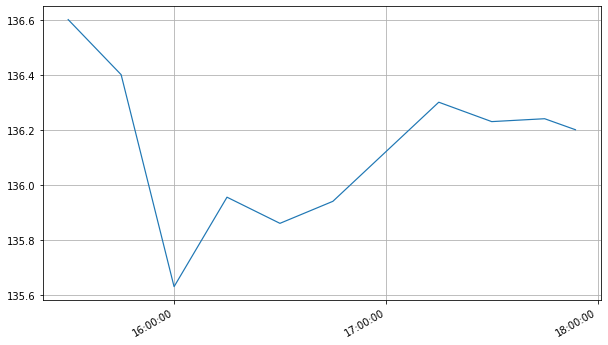

In [6]:
#Mostramos un sencillo gráfico con los datos obtenidos
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%pylab inline

register_matplotlib_converters()
fig, ax = plt.subplots()

hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%H:%M:%S')

ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
ax.plot(df['date'], df['close'], linewidth = 1.2)

fig.set_size_inches(10, 6)
fig.autofmt_xdate()

plt.grid()
